# Insurance Policy Predcition

In [1]:
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io

from scipy import misc

%matplotlib inline

C:\Users\HIRAL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data Loading

In [2]:
data=pd.read_csv('data1.csv')

In [190]:
data.describe()


,Policy1,Policy2,No_Kids,Age,Maratial_status,Gender,Income,Education,Smoking.and.alcohol,Weight,Height,Term,sumAssured
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3.999000e+03
mean,4.924231,2.702676,0.810453,31.290073,0.638410,0.496624,22.817954,1.692673,0.482871,77.788697,169.810203,24.809202,4.662456e+06
std,1.947667,0.635273,0.842577,14.260367,0.480521,0.500051,30.147841,0.976627,0.499769,18.908513,11.928113,9.301834,6.455826e+06
min,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,150.000000,10.000000,7.914500e+04
25%,4.000000,3.000000,0.000000,23.000000,0.000000,0.000000,1.000000,1.000000,0.000000,62.000000,159.000000,20.000000,3.000000e+05
50%,5.000000,3.000000,1.000000,27.000000,1.000000,0.000000,6.000000,2.000000,0.000000,78.000000,170.000000,23.000000,1.340821e+06
75%,7.000000,3.000000,2.000000,39.000000,1.000000,1.000000,41.000000,2.000000,1.000000,94.000000,180.000000,27.000000,7.500000e+06
max,8.000000,3.000000,2.000000,70.000000,1.000000,1.000000,100.000000,3.000000,1.000000,110.000000,190.000000,70.000000,5.420000e+07


# Splitting Data

In [4]:
train,test=train_test_split(data,test_size=0.2)

In [5]:
print("Training size: {} Test Size:{}".format(len(train),len(test)))

Training size: 3199 Test Size:800


In [6]:
train.shape

(3199, 14)

# Decision Tree Implementation

In [169]:
c=DecisionTreeClassifier(min_samples_split=200)
c

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
features=["No_Kids","Age","Maratial_status","Gender","Income","Education","Smoking.and.alcohol","Weight","Height","Term","sumAssured"]

In [9]:
X_train=train[features]
Y_train=train["Policy1"]

In [10]:
X_test=test[features]
Y_test=test["Policy1"]

In [11]:
Y_test

2712    6
3008    7
2610    5
3905    8
2475    5
3172    7
2997    7
3904    8
1649    5
2422    5
1444    5
855     3
2115    5
2692    6
1729    5
1260    4
439     2
1907    5
1805    5
1306    5
2420    5
69      1
114     1
1478    5
3198    7
756     3
3470    7
2817    7
62      1
1193    4
       ..
3246    7
3708    7
814     3
2873    7
502     2
887     4
701     3
2687    6
125     1
2890    7
2144    5
1511    5
2234    5
454     2
3577    7
3666    7
2128    5
3334    7
2484    5
1239    4
3002    7
1966    5
92      1
371     2
282     1
833     3
3468    7
893     4
2681    6
2131    5
Name: Policy1, Length: 800, dtype: int64

X_test.to_csv('xtest.csv')
Y_test.to_csv('ytest.csv')
X_train.to_csv('xtrain.csv')
Y_train.to_csv('ytrain.csv')

In [43]:
dt1=c.fit(X_train,Y_train)

In [13]:
Y_pred=c.predict(X_test)

Y_pred

array([6, 7, 5, 8, 5, 7, 7, 8, 5, 5, 5, 3, 5, 6, 5, 4, 2, 5, 5, 5, 5, 1,
       1, 5, 7, 3, 7, 7, 1, 4, 4, 1, 8, 4, 5, 7, 3, 1, 1, 7, 5, 7, 7, 1,
       4, 7, 3, 8, 5, 1, 5, 5, 7, 5, 5, 7, 5, 3, 7, 6, 5, 5, 5, 7, 5, 4,
       5, 4, 5, 5, 5, 7, 8, 5, 5, 7, 5, 4, 1, 1, 5, 1, 2, 6, 5, 4, 7, 7,
       4, 7, 5, 7, 7, 5, 8, 7, 5, 4, 2, 5, 5, 7, 8, 5, 2, 3, 5, 5, 5, 5,
       5, 7, 7, 7, 7, 4, 6, 7, 2, 7, 3, 7, 7, 3, 5, 3, 4, 7, 2, 1, 8, 8,
       2, 8, 5, 5, 5, 7, 5, 5, 7, 7, 5, 7, 7, 6, 5, 5, 5, 7, 7, 7, 4, 5,
       7, 3, 4, 4, 7, 5, 7, 3, 2, 7, 1, 7, 7, 5, 3, 7, 1, 7, 7, 5, 7, 5,
       7, 5, 4, 7, 8, 8, 7, 2, 7, 5, 4, 4, 5, 5, 7, 7, 4, 7, 5, 3, 7, 5,
       5, 5, 3, 5, 5, 5, 5, 2, 5, 5, 4, 5, 4, 7, 2, 7, 7, 8, 5, 5, 3, 6,
       3, 5, 7, 5, 8, 1, 7, 7, 8, 7, 5, 4, 5, 5, 4, 5, 7, 5, 4, 5, 4, 7,
       5, 7, 2, 5, 8, 7, 7, 8, 5, 2, 5, 5, 2, 5, 3, 5, 7, 8, 5, 8, 6, 4,
       7, 4, 7, 5, 2, 8, 5, 2, 5, 7, 7, 5, 4, 5, 5, 7, 5, 1, 7, 2, 7, 3,
       7, 5, 5, 5, 5, 4, 3, 5, 7, 5, 5, 5, 7, 7, 4,

In [44]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,Y_pred)*100


In [45]:
print("Accuracy using Decision Tree:",score,"%")

Accuracy using Decision Tree: 89.0 %


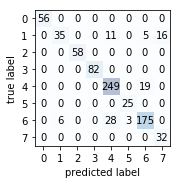

In [291]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


cm = confusion_matrix(y_target=Y_test, 
                      y_predicted=Y_pred, 
                      binary=False)
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()


In [16]:
import sklearn
def show_tree(tree,features,path):
    f=io.StringIO()
    sklearn.tree.export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)

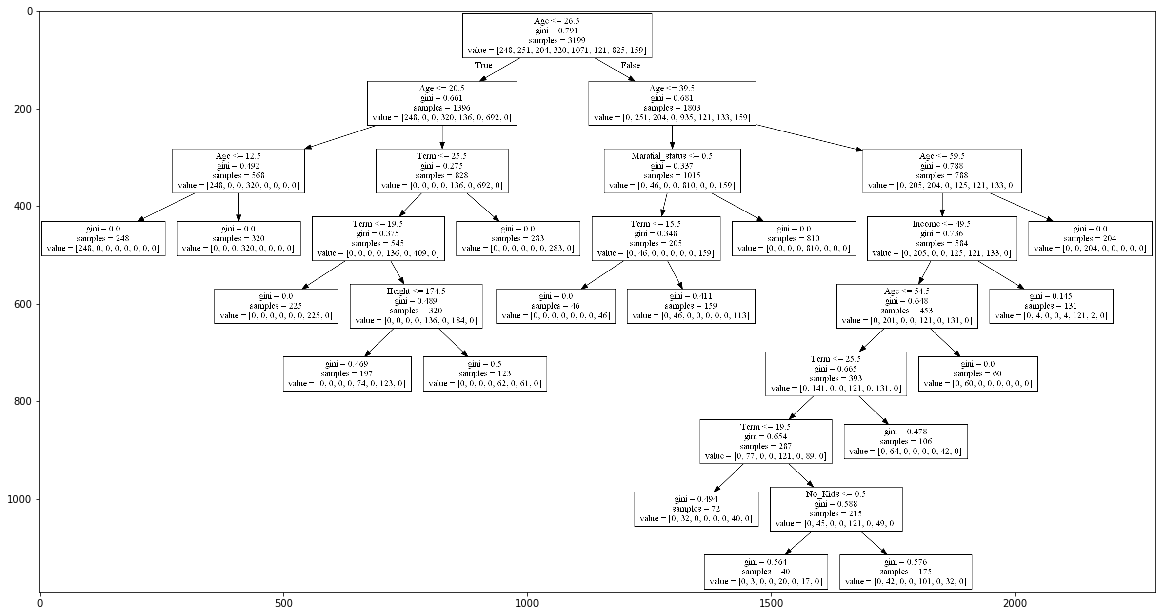

In [17]:
show_tree(dt,features,'dec_tree_01.png')

# Representing the Model as a Function

In [188]:
def tree_to_code(tree, feature_names):



    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
    indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [189]:
 tree_to_code(dt1, list(features))

def tree(No_Kids, Age, Maratial_status, Gender, Income, Education, Smoking.and.alcohol, Weight, Height, Term, sumAssured):
  if Age <= 26.5:
    if Age <= 20.5:
      if Age <= 12.5:
        return [[248.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 248.   0.   0.   0.   0.   0.]]
      else:  # if Age > 12.5
        if Term <= 51.5:
          if sumAssured <= 27900000.0:
            if sumAssured <= 24850000.0:
              if Height <= 150.5:
                return [[0. 0. 0. 7. 0. 0. 0. 0.]
 [3. 1. 3. 0. 0. 0. 0. 0.]]
              else:  # if Height > 150.5
                if sumAssured <= 1950000.0:
                  return [[  0.   0.   0. 150.   0.   0.   0.   0.]
 [ 19.  19. 112.   0.   0.   0.   0.   0.]]
                else:  # if sumAssured > 1950000.0
                  return [[ 0.  0.  0. 51.  0.  0.  0.  0.]
 [ 8.  0. 43.  0.  0.  0.  0.  0.]]
            else:  # if sumAssured > 24850000.0
              return [[0. 0. 0. 3. 0. 0. 0. 0.]
 [2. 0. 1. 0. 0. 0. 0. 0.]]
 

# Random Forest Hyperparameter tuning

In [197]:
grid_times = {}
clf = RandomForestClassifier(random_state = 84)

#features = X_train.columns.drop(['Name', 'PassengerId'], 1)

# I commented this out after running once locally since this block of code takes a long time to run
'''
for number in np.arange(2, 600, 50):
    
    param = np.arange(1,number,10)
    param_grid = {"n_estimators": param,
                  "criterion": ["gini", "entropy"]}
    
    grid_search = GridSearchCV(clf, param_grid = param_grid)
    
    t0 = time()
    grid_search.fit(X_train[features], y_train)
    compute_time = time() - t0
    grid_times[len(grid_search.grid_scores_)] = time() - t0
    
grid_times = pd.DataFrame.from_dict(grid_times, orient = 'index')
'''

# hard-coded values were found by running code above
grid_times = {0: { 2: 0.034411907196044922,
                  12: 1.5366179943084717,
                  22: 5.0431020259857178,
                  32: 11.378448963165283,
                  42: 20.211128950119019,
                  52: 30.040457010269165,
                  62: 39.442277908325195,
                  72: 56.834053993225098,
                  82: 67.847633838653564,
                  92: 91.005517959594727,
                  102: 111.2420859336853,
                  112: 135.75759792327881}}

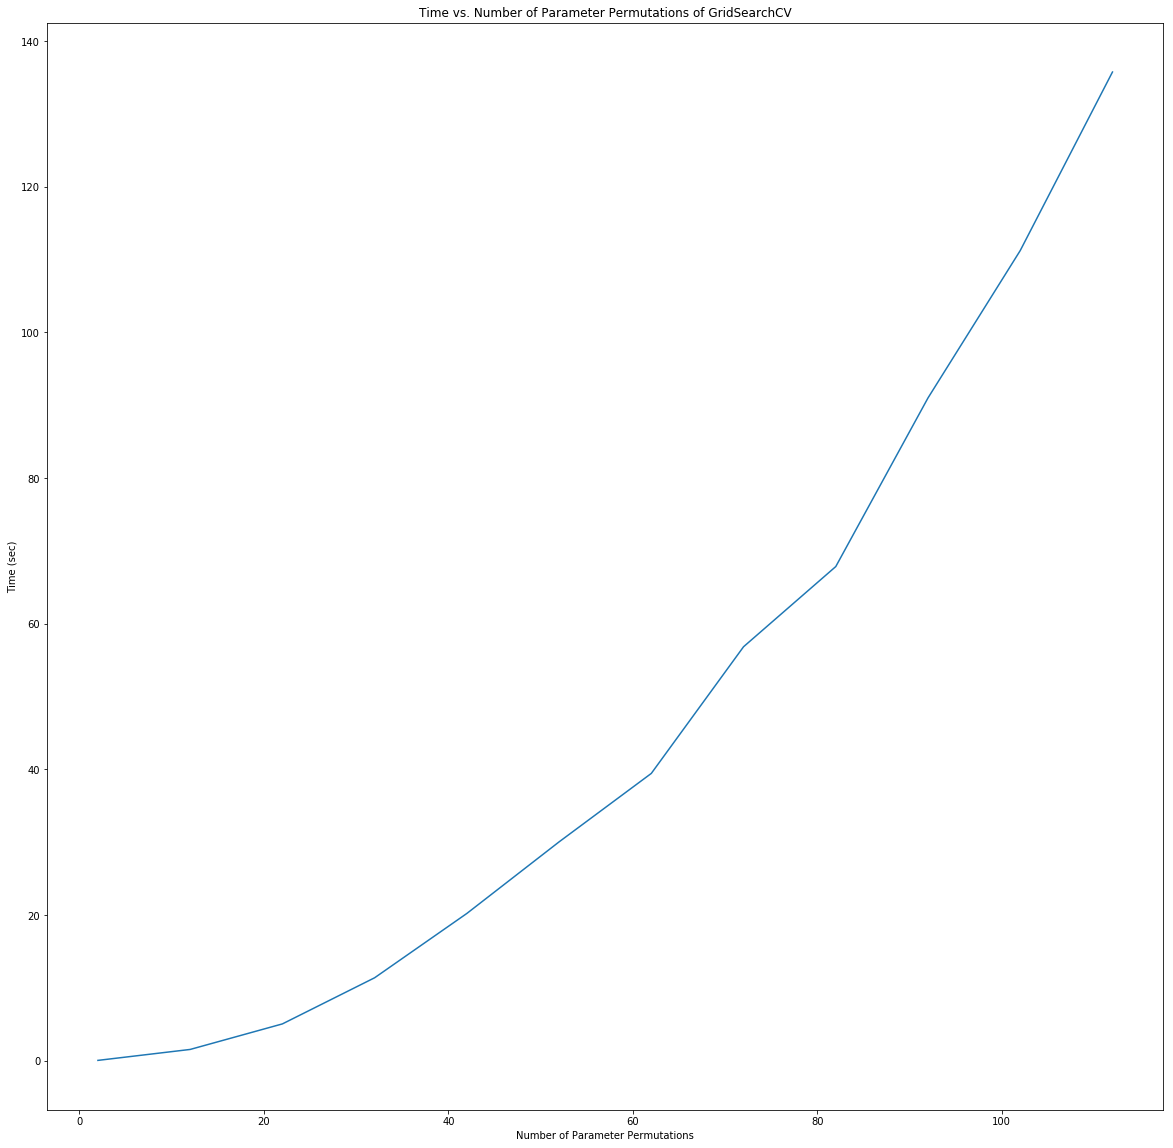

In [198]:
final = pd.DataFrame.from_dict(grid_times)
final = final.sort_index()
plt.plot(final.index.values, final[0])
plt.xlabel('Number of Parameter Permutations')
plt.ylabel('Time (sec)')
plt.title('Time vs. Number of Parameter Permutations of GridSearchCV')

In [199]:
# function takes a RF parameter and a ranger and produces a plot and dataframe of CV scores for parameter values
def evaluate_param(parameter, num_range, index):
    grid_search = GridSearchCV(clf, param_grid = {parameter: num_range})
    grid_search.fit(X_train[features], y_train)
    
    df = {}
    for i, score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
       
    
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df

In [282]:
param_grid = {"n_estimators": np.arange(2, 100, 2),
              "max_depth": np.arange(1, 28, 1),
              }

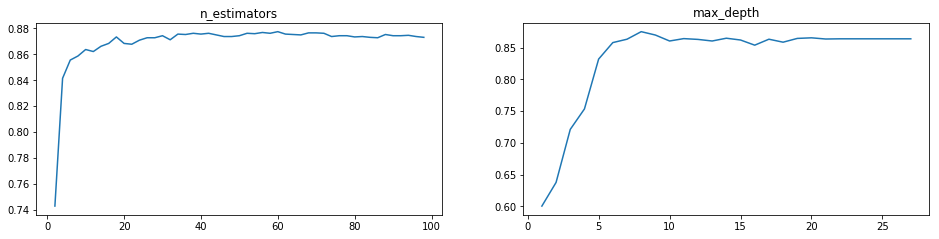

In [283]:
y_train=Y_train
from sklearn.grid_search import GridSearchCV
index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(param_grid):   
    evaluate_param(parameter, param_range, index)
    index += 1

# Random Forest Implementation

In [230]:
rf= RandomForestClassifier(n_estimators=950)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=950, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [231]:
Y_pred1=rf.predict(X_test)

In [232]:
Y_pred1

array([6, 7, 5, 8, 5, 7, 7, 8, 5, 5, 5, 3, 5, 6, 5, 4, 2, 5, 5, 5, 5, 1,
       1, 5, 7, 3, 7, 7, 1, 4, 4, 1, 8, 4, 5, 7, 3, 1, 1, 7, 5, 7, 7, 1,
       4, 7, 3, 8, 5, 1, 5, 5, 7, 5, 5, 7, 5, 3, 7, 6, 5, 5, 5, 7, 5, 4,
       5, 4, 5, 5, 5, 7, 8, 7, 5, 7, 5, 4, 1, 1, 5, 1, 2, 7, 5, 4, 7, 7,
       4, 7, 5, 7, 7, 5, 8, 2, 5, 4, 2, 5, 5, 7, 8, 5, 2, 3, 7, 5, 5, 5,
       5, 7, 7, 7, 7, 4, 6, 7, 2, 7, 3, 5, 7, 3, 5, 3, 4, 7, 2, 1, 8, 8,
       2, 8, 5, 5, 5, 7, 5, 5, 7, 7, 5, 7, 7, 6, 5, 7, 5, 7, 7, 7, 4, 5,
       7, 3, 4, 4, 7, 5, 7, 3, 7, 7, 1, 7, 7, 5, 3, 7, 1, 7, 7, 5, 7, 5,
       7, 5, 4, 7, 8, 8, 7, 2, 7, 5, 4, 4, 5, 5, 7, 7, 4, 2, 5, 3, 7, 7,
       5, 5, 3, 5, 5, 5, 5, 2, 5, 5, 4, 5, 4, 7, 2, 7, 7, 8, 5, 5, 3, 6,
       3, 5, 7, 5, 8, 1, 7, 7, 2, 7, 5, 4, 5, 5, 4, 5, 7, 5, 4, 5, 4, 7,
       5, 7, 2, 5, 8, 7, 7, 8, 5, 2, 5, 5, 2, 5, 3, 5, 7, 8, 5, 8, 6, 4,
       7, 4, 7, 5, 7, 8, 5, 2, 5, 7, 7, 5, 4, 7, 5, 7, 5, 1, 2, 2, 7, 3,
       7, 5, 7, 5, 5, 4, 3, 5, 7, 5, 5, 7, 7, 7, 4,

In [294]:
score2=accuracy_score(Y_test,Y_pred1)*100

print("Accuracy using Random Forest:",score2,"%")

Accuracy using Random Forest: 89.125 %


In [235]:

filename = 'rfsingleclass1.sav'
joblib.dump(rf, filename)

Accuracy using Random Forest: 89.125 %


['rfsingleclass1.sav']

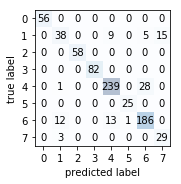

In [292]:
cm = confusion_matrix(y_target=Y_test, 
                      y_predicted=Y_pred1, 
                      binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

# Loading  Random Forest Model

In [268]:
loaded_model = joblib.load('rfsingleclass1.sav')
Y1= loaded_model.predict(X_test)


In [293]:
scoreRandomForest=accuracy_score(Y_test,Y1)*100
print("Score RF",scoreRandomForest,"%")
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, data[features], data["Policy1"], cv=5)
scores


Score RF 89.125 %


array([0.83333333, 0.85785536, 0.85982478, 0.82706767, 0.48115578])

In [23]:
i_tree = 0
for tree_in_forest in rf.estimators_:
    if i_tree<=3:
        dotfile=io.StringIO()
        tree.export_graphviz(tree_in_forest, out_file=dotfile)
        pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree'+ str(i_tree) +'.png')
        i_tree = i_tree + 1
       

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.707558 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.817356 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.976283 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.863767 to fit



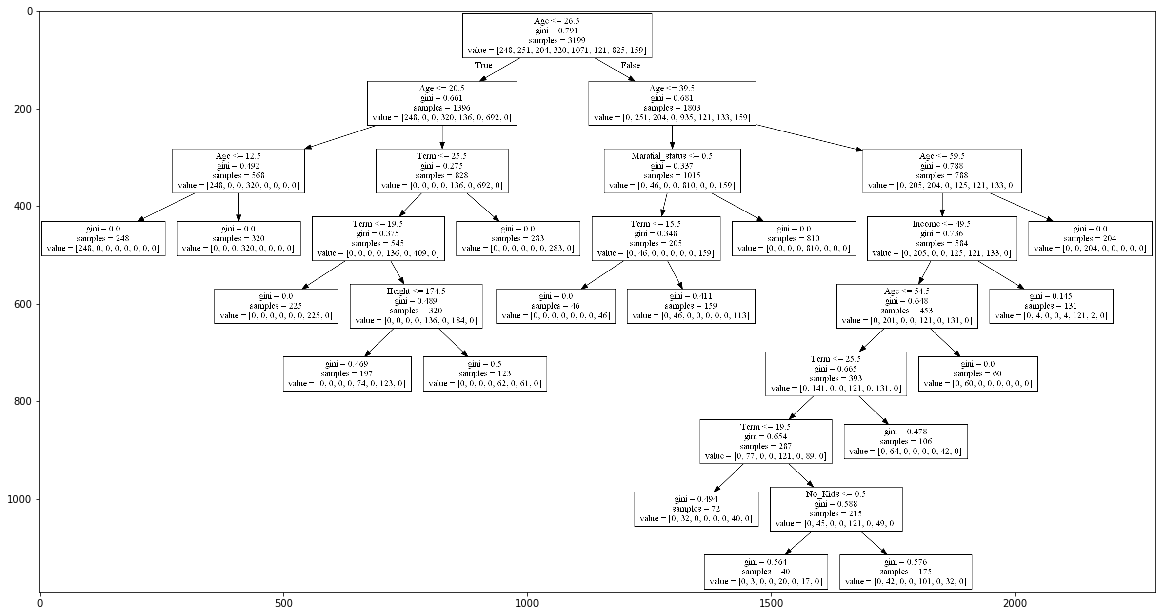

In [24]:
show_tree(dt,features,'dtree0.png')
show_tree(dt,features,'dtree1.png')
show_tree(dt,features,'dtree2.png')
show_tree(dt,features,'dtree3.png')



# Multiclass Classification 

In [25]:
Y_train2=train[["Policy1","Policy2"]]
Y_test2=test[["Policy1","Policy2"]]

In [26]:
print(Y_train2)


      Policy1  Policy2
3642        7        3
785         3        3
1595        5        3
3827        8        3
1604        5        3
2996        7        3
2735        6        1
3237        7        1
3986        8        3
1243        4        3
406         2        3
532         2        3
1185        4        3
1889        5        1
3574        7        3
1330        5        3
2901        7        2
1787        5        3
949         4        3
725         3        3
718         3        3
255         1        3
2891        7        1
1466        5        3
3434        7        3
1707        5        3
1861        5        3
2205        5        3
3320        7        1
316         2        3
...       ...      ...
250         1        3
434         2        3
407         2        3
3126        7        3
1852        5        3
3556        7        2
586         2        1
3100        7        2
1226        4        1
834         3        3
3676        7        1
1773       

In [27]:
dt=c.fit(X_train,Y_train2)
Y_pred3=c.predict(X_test)

Y_pred3

array([[6., 3.],
       [7., 3.],
       [5., 3.],
       ...,
       [4., 3.],
       [6., 3.],
       [5., 3.]])

In [82]:
score2=accuracy_score(Y_test2[Y_test2.columns[0]],Y_pred3[:,0])*100
score3=accuracy_score(Y_test2[Y_test2.columns[1]],Y_pred3[:,1])*100

print("Accuracy using Decision Tree for policy1:",score2,"%")
print("Accuracy using Decision Tree for policy2:",score3,"%")


Accuracy using Decision Tree for policy1: 89.0 %
Accuracy using Decision Tree for policy2: 80.125 %


# Saving   Models


In [49]:
from sklearn.externals import joblib
filename = 'singleclassdecisiontree.sav'
joblib.dump(dt1, filename)

['singleclassdecisiontree.sav']

In [30]:
filename = 'randomforestsingle.sav'
joblib.dump(rf, filename)

['randomforestsingle.sav']

In [50]:
filename = 'dtmulticlass.sav'
joblib.dump(dt, filename)

['dtmulticlass.sav']

# Random Forest Multiclass

In [295]:
rf2=rf.fit(X_train,Y_train2)
Y_pred4=rf2.predict(X_test)

Y_pred4

array([[6., 3.],
       [5., 3.],
       [5., 3.],
       ...,
       [4., 3.],
       [6., 3.],
       [5., 3.]])

In [296]:
score2_rf=accuracy_score(Y_test2[Y_test2.columns[0]],Y_pred4[:,0])*100
score3_rf=accuracy_score(Y_test2[Y_test2.columns[1]],Y_pred4[:,1])*100

print("Accuracy using Random Forest for policy1:",score2_rf,"%")
print("Accuracy using Random Foresr for policy2:",score3_rf,"%")

Accuracy using Random Forest for policy1: 88.5 %
Accuracy using Random Foresr for policy2: 80.875 %


In [64]:
filename = 'rfmulticlass.sav'
joblib.dump(rf, filename)

['rfmulticlass.sav']

In [284]:
filename = 'dtclass950.sav'
joblib.dump(dt, filename)

['dtclass950.sav']